Joey Thewes - Spotify API Data Report

The hypothesis that could be tested is that Taylor Swift's older albums are still just as or even more popular than her newest one. The theoretical applications of this hypothesis is that Taylor's older albums are better received and more played than her new ones, which could mean that she struggles to release as good music as of recent. The statistical application of this hypothesis is that maybe the success of songs depend on their length.

In [2]:
import urllib
import json
import pandas as pd
import requests
import base64
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns

In [3]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii"))
    
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = data, headers = header)
    
    print(response.status_code)
    return response.json()['access_token']

In [4]:
keys = pd.read_csv(r"C:\Users\Joey\data-EMAT-fa24\Spotify_API.txt")
#keys

In [5]:
access_token = get_session_token(keys['Client_Id'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [6]:
album_ep = 'https://api.spotify.com/v1/albums/{}'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

When talking about the endpoints that I used, I used a few extra than I realized I actually needed to to test my hypothesis. I wanted to use the "album" endpoint because it has the value within its API called "Popularity" which rates the album on a scale from 0-100 (100 being the best). I also used the "tracks" endpoint which enables the ability to get to see the info for the tracks within the album, I used this to get the popularity value for every album. The last endpoint I used was actually not used to help my hypothesis, this was used to try to see more of the tracks within the albums, but this was before I realized that it did not have a popularity value, so it was not super useful. This data could definitely be useful to check my hypothesis, but what I feel is missing from these endpoints is more evidence to support why a track might be more popular, such as danceibility or more information regarding the music itself to prove why a song might be more popular

In [7]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [8]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [9]:
lvr_album_id = '1NAmidJlEaVgA3MpcPFYGq'
tpd_album_id = '5H7ixXZfsNMGbIE5OBSpcb'

The "lvr_album_id" is the album for Taylor Swift's "Lover" album, which is one of her older albums, while the "tpd_album_id" is the album id for her "Tourtured poets department" album which is her most recent album.

In [10]:
lvr_album_response = api_call(ab_tracks_ep.format(lvr_album_id), session_header)
tpd_album_response = api_call(ab_tracks_ep.format(tpd_album_id), session_header)

200
200


In [11]:
lvr_album_df = pd.DataFrame(lvr_album_response['items'])
tpd_album_df = pd.DataFrame(tpd_album_response['items'])
lvr_album_df

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,170640,False,{'spotify': 'https://open.spotify.com/track/43...,https://api.spotify.com/v1/tracks/43rA71bccXFG...,43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,None,1,track,spotify:track:43rA71bccXFGD4C8GOpIlN,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,178426,False,{'spotify': 'https://open.spotify.com/track/1B...,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,None,2,track,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,221306,False,{'spotify': 'https://open.spotify.com/track/1d...,https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...,1dGr1c8CrMLDpV6mPbImSI,Lover,None,3,track,spotify:track:1dGr1c8CrMLDpV6mPbImSI,False
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,190360,False,{'spotify': 'https://open.spotify.com/track/3R...,https://api.spotify.com/v1/tracks/3RauEVgRgj1I...,3RauEVgRgj1IuWdJ9fDs70,The Man,None,4,track,spotify:track:3RauEVgRgj1IuWdJ9fDs70,False
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,211240,False,{'spotify': 'https://open.spotify.com/track/3p...,https://api.spotify.com/v1/tracks/3pHkh7d0lzM2...,3pHkh7d0lzM2AldUtz2x37,The Archer,None,5,track,spotify:track:3pHkh7d0lzM2AldUtz2x37,False
5,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,173386,False,{'spotify': 'https://open.spotify.com/track/2Y...,https://api.spotify.com/v1/tracks/2YWtcWi3a83p...,2YWtcWi3a83pdEg3Gif4Pd,I Think He Knows,None,6,track,spotify:track:2YWtcWi3a83pdEg3Gif4Pd,False
6,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,234146,False,{'spotify': 'https://open.spotify.com/track/21...,https://api.spotify.com/v1/tracks/214nt20w5wOx...,214nt20w5wOxJnY462klLw,Miss Americana & The Heartbreak Prince,None,7,track,spotify:track:214nt20w5wOxJnY462klLw,False
7,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,222400,False,{'spotify': 'https://open.spotify.com/track/4y...,https://api.spotify.com/v1/tracks/4y5bvROuBDPr...,4y5bvROuBDPr5fuwXbIBZR,Paper Rings,None,8,track,spotify:track:4y5bvROuBDPr5fuwXbIBZR,False
8,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,287266,False,{'spotify': 'https://open.spotify.com/track/12...,https://api.spotify.com/v1/tracks/12M5uqx0Zuwk...,12M5uqx0ZuwkpLp5rJim1a,Cornelia Street,None,9,track,spotify:track:12M5uqx0ZuwkpLp5rJim1a,False
9,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,198533,False,{'spotify': 'https://open.spotify.com/track/2d...,https://api.spotify.com/v1/tracks/2dgFqt3w9xIQ...,2dgFqt3w9xIQRjhPtwNk3D,Death By A Thousand Cuts,None,10,track,spotify:track:2dgFqt3w9xIQRjhPtwNk3D,False


This is the first dataframe that I created that did not include the popularity value, so I did not end up using this

In [12]:
lvr_track_ids = ','.join(lvr_album_df['id'].to_list())
tpd_track_ids = ','.join(tpd_album_df['id'].to_list())

In [13]:
album_ep + '?ids={}'.format(lvr_track_ids)

'https://api.spotify.com/v1/albums/{}?ids=43rA71bccXFGD4C8GOpIlN,1BxfuPKGuaTgP7aM0Bbdwr,1dGr1c8CrMLDpV6mPbImSI,3RauEVgRgj1IuWdJ9fDs70,3pHkh7d0lzM2AldUtz2x37,2YWtcWi3a83pdEg3Gif4Pd,214nt20w5wOxJnY462klLw,4y5bvROuBDPr5fuwXbIBZR,12M5uqx0ZuwkpLp5rJim1a,2dgFqt3w9xIQRjhPtwNk3D,1LLXZFeAHK9R4xUramtUKw,4AYtqFyFbX0Xkc2wtcygTr,5hQSXkFgbxjZo9uCwd11so,6RRNNciQGZEXnqk8SQ9yv5,1SymEzIT3H8UZfibCs3TYi,2Rk4JlNc2TPmZe2af99d45,1SmiQ65iSAbPto6gPFlBYm,1fzAuUVbzlhZ1lJAx9PtY6'

In [14]:
lvr_album_features = api_call(album_ep.format(lvr_album_id), session_header)
tpd_album_features = api_call(album_ep.format(tpd_album_id), session_header)


200
200


In [15]:
lvr_album_features['popularity']

93

This was the popularity value for her "Lover" Album, which ended up being a value of 92

In [16]:
tpd_album_features['popularity']

93

This was the popularity value for her "Tortured Poets Department" album, which ended up being a value of 93. After getting the popularity values for the albums themselves, and seeing that her newer released album was more popular by a slim margin, I wanted to see what the value was for every one of her tracks on the album

In [17]:
lvr_tracks_info = api_call(tracks_ep + '?ids={}'.format(lvr_track_ids), session_header)
tpd_tracks_info = api_call(tracks_ep + '?ids={}'.format(tpd_track_ids), session_header)

200
200


In [18]:
lvr_tracks_df = pd.DataFrame(lvr_tracks_info['tracks'])
tpd_tracks_df = pd.DataFrame(tpd_tracks_info['tracks'])
lvr_tracks_df.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,170640,False,{'isrc': 'USUG11901471'},{'spotify': 'https://open.spotify.com/track/43...,https://api.spotify.com/v1/tracks/43rA71bccXFG...,43rA71bccXFGD4C8GOpIlN,False,I Forgot That You Existed,68,None,1,track,spotify:track:43rA71bccXFGD4C8GOpIlN
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,178426,False,{'isrc': 'USUG11901472'},{'spotify': 'https://open.spotify.com/track/1B...,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,1BxfuPKGuaTgP7aM0Bbdwr,False,Cruel Summer,89,None,2,track,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,221306,False,{'isrc': 'USUG11901473'},{'spotify': 'https://open.spotify.com/track/1d...,https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...,1dGr1c8CrMLDpV6mPbImSI,False,Lover,84,None,3,track,spotify:track:1dGr1c8CrMLDpV6mPbImSI
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,190360,False,{'isrc': 'USUG11901474'},{'spotify': 'https://open.spotify.com/track/3R...,https://api.spotify.com/v1/tracks/3RauEVgRgj1I...,3RauEVgRgj1IuWdJ9fDs70,False,The Man,79,None,4,track,spotify:track:3RauEVgRgj1IuWdJ9fDs70
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,211240,False,{'isrc': 'USUG11901475'},{'spotify': 'https://open.spotify.com/track/3p...,https://api.spotify.com/v1/tracks/3pHkh7d0lzM2...,3pHkh7d0lzM2AldUtz2x37,False,The Archer,73,None,5,track,spotify:track:3pHkh7d0lzM2AldUtz2x37


This is the table that has the data for just her lover album, I used this to test to see if the code I wrote was successful in printing the data I needed

In [19]:
tpd_tracks_df.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,228965,False,{'isrc': 'USUG12401028'},{'spotify': 'https://open.spotify.com/track/6d...,https://api.spotify.com/v1/tracks/6dODwocEuGzH...,6dODwocEuGzHAavXqTbwHv,False,Fortnight (feat. Post Malone),74,None,1,track,spotify:track:6dODwocEuGzHAavXqTbwHv
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,293048,True,{'isrc': 'USUG12401029'},{'spotify': 'https://open.spotify.com/track/4P...,https://api.spotify.com/v1/tracks/4PdLaGZubp4l...,4PdLaGZubp4lghChqp8erB,False,The Tortured Poets Department,72,None,2,track,spotify:track:4PdLaGZubp4lghChqp8erB
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,203801,False,{'isrc': 'USUG12401030'},{'spotify': 'https://open.spotify.com/track/7u...,https://api.spotify.com/v1/tracks/7uGYWMwRy24d...,7uGYWMwRy24dm7RUDDhUlD,False,My Boy Only Breaks His Favorite Toys,74,None,3,track,spotify:track:7uGYWMwRy24dm7RUDDhUlD
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,261228,True,{'isrc': 'USUG12401031'},{'spotify': 'https://open.spotify.com/track/1k...,https://api.spotify.com/v1/tracks/1kbEbBdEgQdQ...,1kbEbBdEgQdQeLXCJh28pJ,False,Down Bad,74,None,4,track,spotify:track:1kbEbBdEgQdQeLXCJh28pJ
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,262974,False,{'isrc': 'USUG12401032'},{'spotify': 'https://open.spotify.com/track/7w...,https://api.spotify.com/v1/tracks/7wAkQFShJ27V...,7wAkQFShJ27V8362MqevQr,False,"So Long, London",74,None,5,track,spotify:track:7wAkQFShJ27V8362MqevQr


This was used to make sure that the Tortured Poets Department code cell worked

In [20]:
lvr_tracks_df['Album'] = "Lover"
tpd_tracks_df['Album'] = "Tortured Poet's Department"

I used this code function to better label the tracks so we could see which song fell under which album

In [21]:
album_compare = pd.concat([lvr_tracks_df, tpd_tracks_df], axis = 0)
album_compare

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri,Album
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,170640,False,{'isrc': 'USUG11901471'},{'spotify': 'https://open.spotify.com/track/43...,https://api.spotify.com/v1/tracks/43rA71bccXFG...,43rA71bccXFGD4C8GOpIlN,False,I Forgot That You Existed,68,None,1,track,spotify:track:43rA71bccXFGD4C8GOpIlN,Lover
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,178426,False,{'isrc': 'USUG11901472'},{'spotify': 'https://open.spotify.com/track/1B...,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,1BxfuPKGuaTgP7aM0Bbdwr,False,Cruel Summer,89,None,2,track,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Lover
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,221306,False,{'isrc': 'USUG11901473'},{'spotify': 'https://open.spotify.com/track/1d...,https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...,1dGr1c8CrMLDpV6mPbImSI,False,Lover,84,None,3,track,spotify:track:1dGr1c8CrMLDpV6mPbImSI,Lover
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,190360,False,{'isrc': 'USUG11901474'},{'spotify': 'https://open.spotify.com/track/3R...,https://api.spotify.com/v1/tracks/3RauEVgRgj1I...,3RauEVgRgj1IuWdJ9fDs70,False,The Man,79,None,4,track,spotify:track:3RauEVgRgj1IuWdJ9fDs70,Lover
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,211240,False,{'isrc': 'USUG11901475'},{'spotify': 'https://open.spotify.com/track/3p...,https://api.spotify.com/v1/tracks/3pHkh7d0lzM2...,3pHkh7d0lzM2AldUtz2x37,False,The Archer,73,None,5,track,spotify:track:3pHkh7d0lzM2AldUtz2x37,Lover
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,173386,False,{'isrc': 'USUG11901476'},{'spotify': 'https://open.spotify.com/track/2Y...,https://api.spotify.com/v1/tracks/2YWtcWi3a83p...,2YWtcWi3a83pdEg3Gif4Pd,False,I Think He Knows,69,None,6,track,spotify:track:2YWtcWi3a83pdEg3Gif4Pd,Lover
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,234146,False,{'isrc': 'USUG11901477'},{'spotify': 'https://open.spotify.com/track/21...,https://api.spotify.com/v1/tracks/214nt20w5wOx...,214nt20w5wOxJnY462klLw,False,Miss Americana & The Heartbreak Prince,75,None,7,track,spotify:track:214nt20w5wOxJnY462klLw,Lover
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,222400,False,{'isrc': 'USUG11901478'},{'spotify': 'https://open.spotify.com/track/4y...,https://api.spotify.com/v1/tracks/4y5bvROuBDPr...,4y5bvROuBDPr5fuwXbIBZR,False,Paper Rings,75,None,8,track,spotify:track:4y5bvROuBDPr5fuwXbIBZR,Lover
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,287266,False,{'isrc': 'USUG11901479'},{'spotify': 'https://open.spotify.com/track/12...,https://api.spotify.com/v1/tracks/12M5uqx0Zuwk...,12M5uqx0ZuwkpLp5rJim1a,False,Cornelia Street,72,None,9,track,spotify:track:12M5uqx0ZuwkpLp5rJim1a,Lover
9,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,198533,False,{'isrc': 'USUG11901480'},{'spotify': 'https://open.spotify.

I was able to combine the two dataframes to make it so we could better compare the two albums popularity rating on the same table

In [22]:
album_compare_tidy = album_compare.drop(columns = ['album', 'artists', 'available_markets', 'disc_number',
                                                   'explicit', 'external_ids', 'external_urls', 'href',
                                                   'id', 'is_local', 'type', 'uri'])

I dropped all of the colums that I did not feel were necessary to the project, that way we could get a better look at the popularityvalues and the album they were associated with, as well as the duration.

In [23]:
album_compare_tidy

,duration_ms,name,popularity,preview_url,track_number,Album
0,170640,I Forgot That You Existed,68,None,1,Lover
1,178426,Cruel Summer,89,None,2,Lover
2,221306,Lover,84,None,3,Lover
3,190360,The Man,79,None,4,Lover
4,211240,The Archer,73,None,5,Lover
5,173386,I Think He Knows,69,None,6,Lover
6,234146,Miss Americana & The Heartbreak Prince,75,None,7,Lover
7,222400,Paper Rings,75,None,8,Lover
8,287266,Cornelia Street,72,None,9,Lover
9,198533,Death By A Thousand Cuts,70,None,10,Lover


After comparing the datasets, it is clear to me that the popularity of her songs are not necessarily dependent on how recently they were released. There are some definite outliers within her "Lover" album, with Cruel Summer being a 90 and Lover being an 85. Overall, however, the average of the "Tortured Poets Department" album is higher than the "Lover" album, which leads in turn to the most recently released album having a higher current popularity rating. My theory that the popularity of a song depended on the length is also untrue, as Cruel Summer is one of the shorter songs in these albums but has the highest popularity rating. I feel as though if I were to analyze more data within these tables, such as the audio features within these songs and albums, I could get a better guage on what affects popularity and why certain songs are a lot less popular than others.

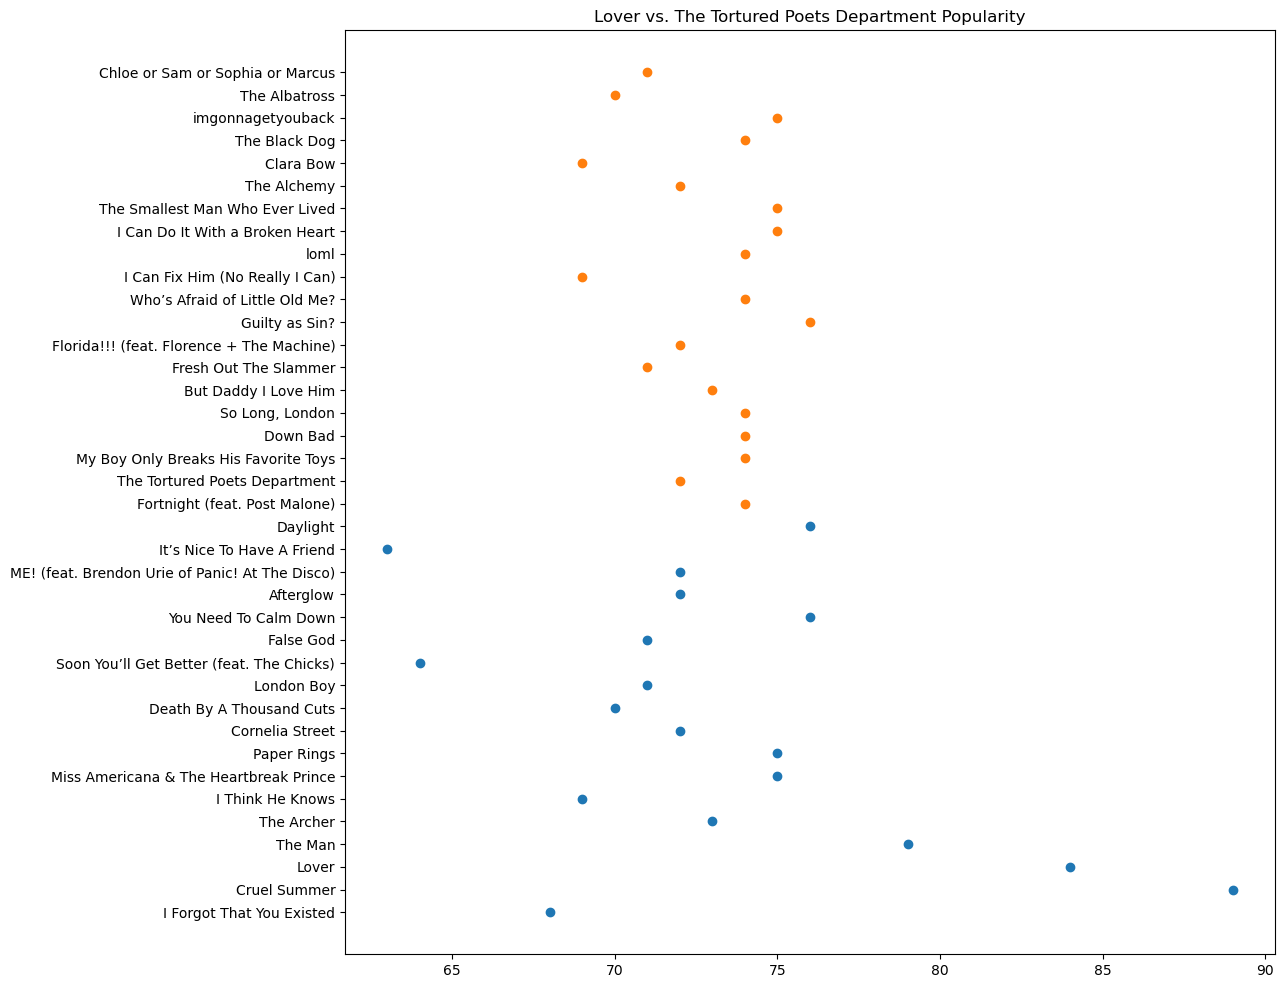

In [24]:
fig1, ax1 = plt.subplots(figsize = (12,12))
ax1.scatter(lvr_tracks_df['popularity'], lvr_tracks_df['name'])
ax1.scatter(tpd_tracks_df['popularity'], tpd_tracks_df['name'])
ax1.set_title('Lover vs. The Tortured Poets Department Popularity')

plt.style.use('fivethirtyeight')
plt.show()

The graph above was the first graph that I made, I set the x axis as the popularity and the y axis as the names of the songs, ubt I wasnt a fan with how the graph turned out, so I wanted to make a second graph that looked a lot nicer than this one

In [25]:
lvr_album_features.keys()

dict_keys(['album_type', 'total_tracks', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'type', 'uri', 'artists', 'tracks', 'copyrights', 'external_ids', 'genres', 'label', 'popularity'])

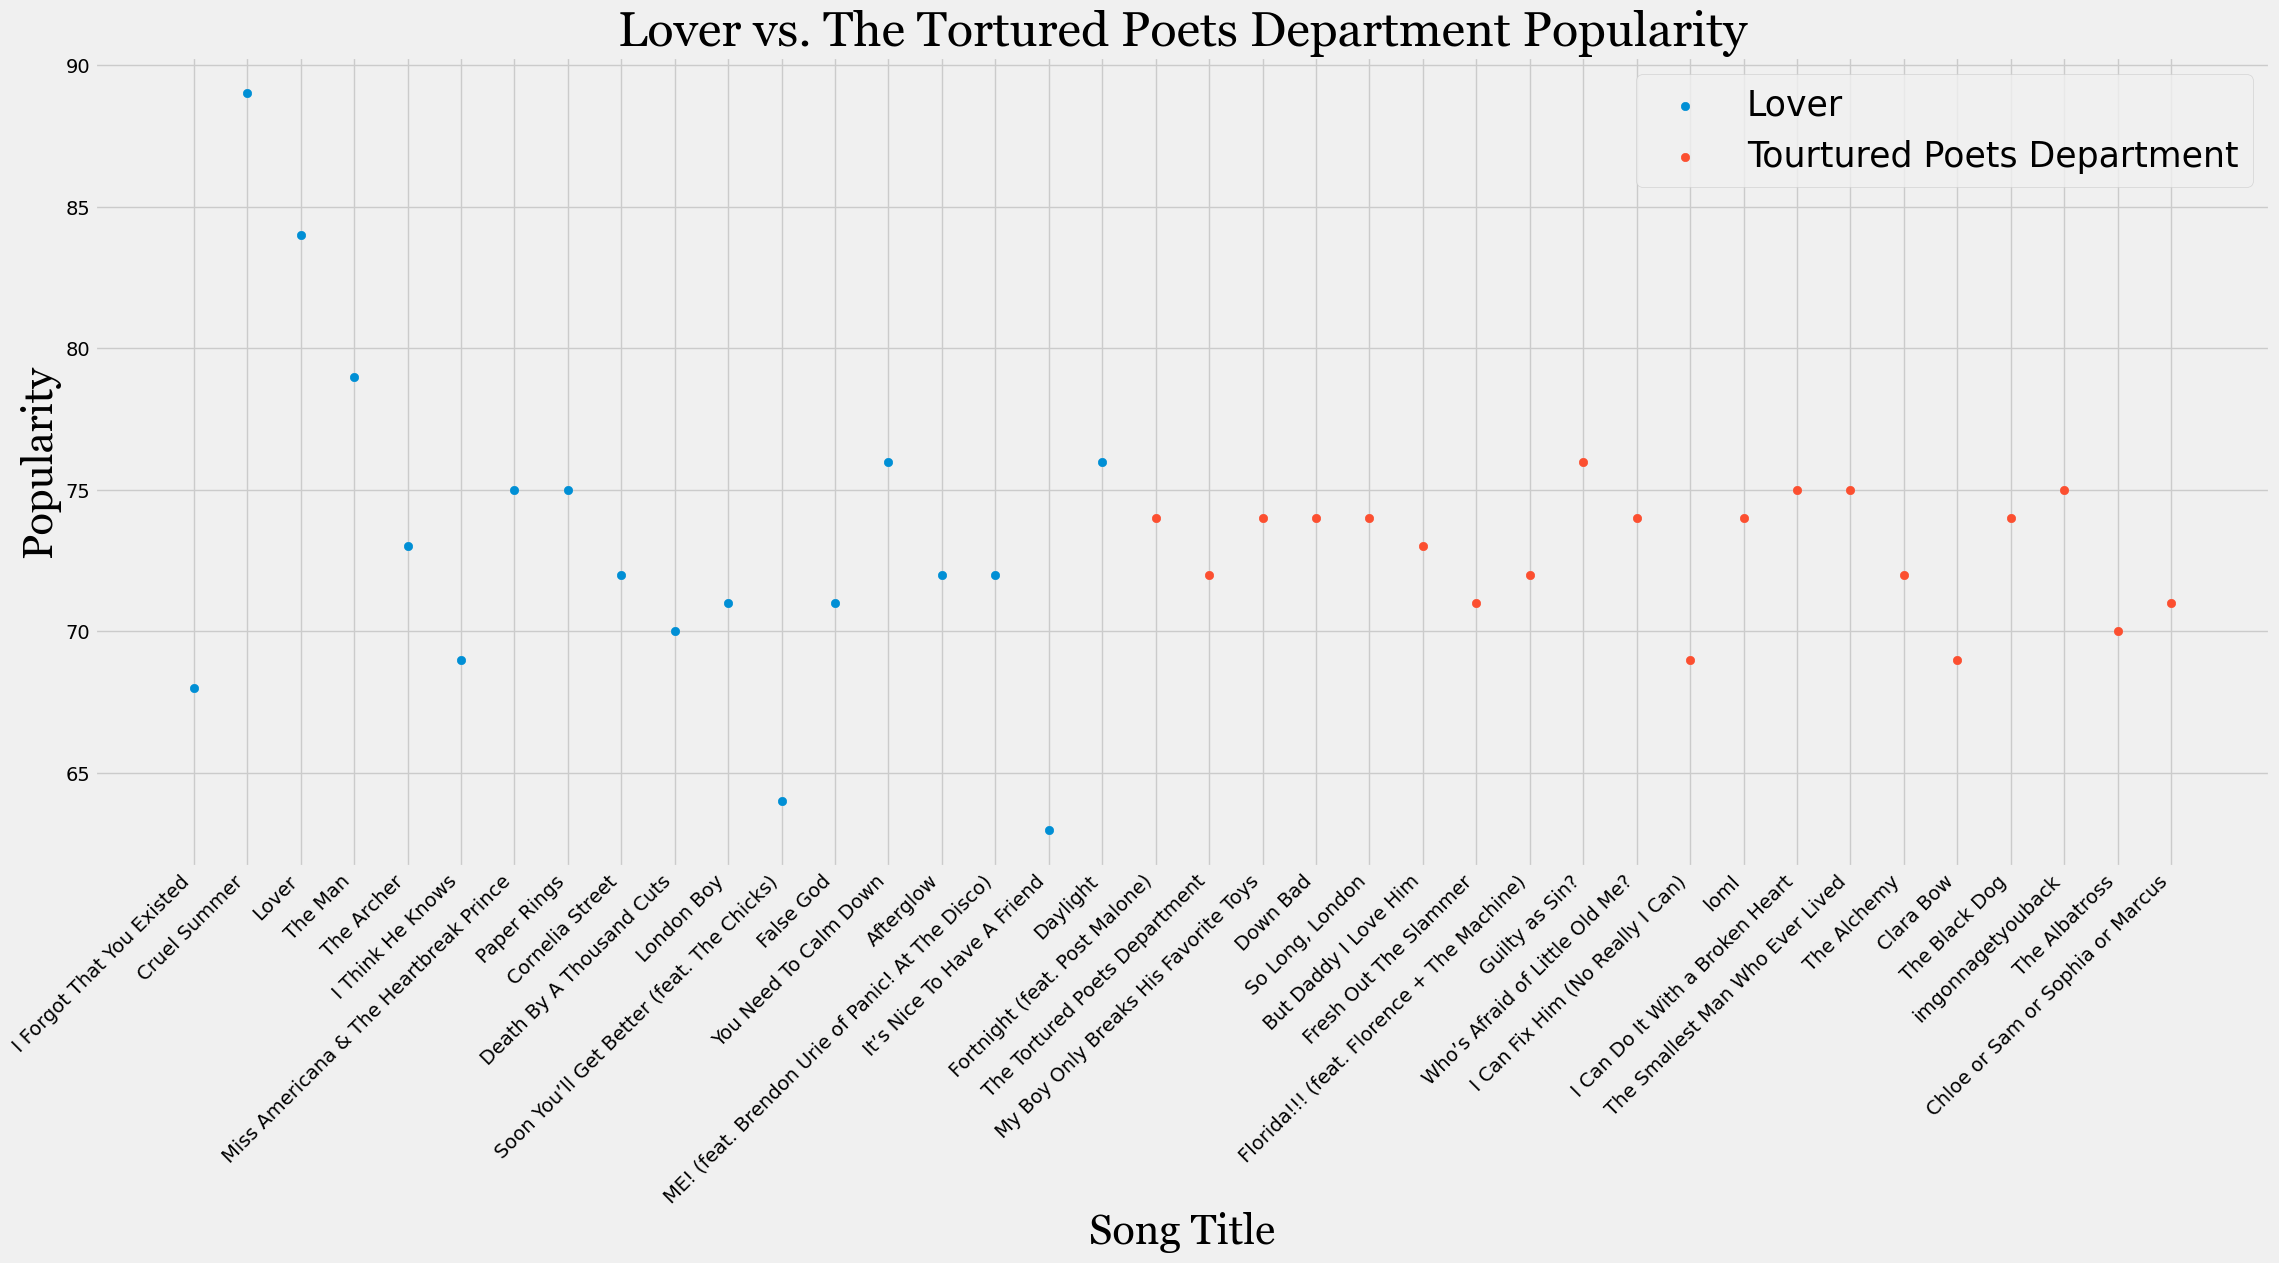

In [28]:
fig1, ax1 = plt.subplots(figsize = (25,10))
lvr_scatter = ax1.scatter(lvr_tracks_df['name'], lvr_tracks_df['popularity'], label = 'Lover',)
tpd_scatter = ax1.scatter(tpd_tracks_df['name'], tpd_tracks_df['popularity'], label = 'Tourtured Poets Department')
csfont = {'fontname':'Georgia'}
ax1.set_title('Lover vs. The Tortured Poets Department Popularity', csfont, fontsize = 35, color = 'black')
ax1.set_xlabel('Song Title', csfont, fontsize = 30, color = 'black')
ax1.set_ylabel('Popularity', csfont, fontsize = 30, color = 'black')
#ax1.set_xticks(
#ax1.set_xticklabels(tpd_tracks_df['name'].to_list() + lvr_tracks_df['name'].to_list(), rotation = 45)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.legend(handles = [lvr_scatter, tpd_scatter], fontsize = 25)
plt.xticks(rotation = 45, ha = "right")
plt.style.use('fivethirtyeight')
plt.show()

This is the final edition of the graphs that I made, I learned how to use rotate the x ticks so that way the songs were all readable while also lining up the the ticks. I was able to create the legend that shows which dots on the graph correspond to which album and the popularity. While looking at this graph, you can tell that with the "Lover" album, there is a lot more skew between the popular and least popular songs, while with "The Tortured Poets Department" the songs are more closely rated, with no real outliers.

In [29]:
album_compare_tidy.describe()

,duration_ms,popularity,track_number
count,38.000000,38.000000,38.000000
mean,223294.052632,73.078947,10.026316
std,45109.918405,4.534442,5.596750
min,150440.000000,63.000000,1.000000
25%,193975.000000,71.000000,5.250000
50%,216062.500000,73.000000,10.000000
75%,243870.000000,75.000000,14.750000
max,340428.000000,89.000000,20.000000


This describe function is describing the whole comparison between the two albums, and I thought this was interesting for the mean popularity for the albums combined, which is about a 73

In [30]:
stats.describe(lvr_tracks_df['popularity'])

DescribeResult(nobs=18, minmax=(63, 89), mean=73.27777777777777, variance=39.977124183006524, skewness=0.762048811813938, kurtosis=0.7169214734085436)

This describe function is showing the popularity values for just the lover album. I think that there is a lot of cool information within this, showing that the mean between the all of the songs of the album is about 73.2, but it shows a high variance and skewness between all of the songs on the album.

In [31]:
stats.describe(tpd_tracks_df['popularity'])

DescribeResult(nobs=20, minmax=(69, 76), mean=72.9, variance=4.199999999999999, skewness=-0.5774139484282629, kurtosis=-0.7311888744417372)

This describe function is showing the popularity values for just the Tortured Poets Department album. I think that the information that we get from this is just as valuable because it shows a little lower mean than the lover at just 72.9, but it has a very low variance compared to the lover as well as a negative skew

Overall, the information that I get from these describe function could help and hurt my hypothesis at the same time, which was that Taylor Swift's old albums were just as or more popular than her most recent release. When we first did this project, I came to the conclusion that her most recent album was just slightly more popular than her older album. Looking at this data from the describe function and the graph, however, makes me think that there could be a different conclusion. The mean of all of the popularity for her Lover album is just a slight bit higher than the mean for the Tortured Poets Department album, leading me to believe that since the mean is higher for Lover, this is the more popular album. However, the issue I have with this conclusion is that since the variance is so high between the songs in the Lover album compared to the Tortured Poets Department, I feel that hat conclusion is not accurate since the mean is thrown off by the high variance. I feel as thought the way that I approached this when we first did this project gives a pretty solid answer to my original hypothesis, as looking at the overall popularity of the album gives me more exact information than the mean of the album might, since the variance is so high.